<a href="https://colab.research.google.com/github/AnaMariaSuarezJimenez/deeplearning/blob/main/Ejercicio%20Regularizadores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio con regularizadores

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)
from keras.datasets import mnist
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.9.2


In [3]:
# Descarga los datos de MNIST
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [4]:
len(train_labels) 

60000

In [5]:
len(test_labels)

10000

In [6]:
# Prepara con reshape y normaliza las imágenes tanto de entrenamiento como de test
train_images =train_images.reshape(60000,28*28)
test_images=test_images.reshape(10000,28*28)
#Normalizmos los datos de test y de entranimento 
train_images = train_images.astype('float32') / 255
test_images  = test_images.astype('float32') / 255

In [7]:
# Crear un subconjunto de imágenes de entrenamiento que llamaré
# validation_images, para hacer las validaciones, con las 10000 últimas imágenes 
# del set de datos de entrenamiento (train_images) (obviamente, lo mismo con las
# etiquetas correspondientes -> validation_labels). Deja preparadas las 50K 
# primeras imágenes y etiquetas para entrenamiento (train_images y train_labels)

validation_images=train_images[50000:]
train_images=train_images[:49999]
validation_labels=train_labels[50000:]
train_labels=train_labels[:49999]

In [32]:
def crea_modelo(regularizador):
  # Define una función que recibe un número del 0 al 4 que creará:
  # un modelo secuencial con una capa de entrada densa de 512 neuronas
  # con activación relu y la capa de salida que le corresponda según el problema
  # Ahora, en función del número del regularizador:
  # Si es 0, no mete ningún regularizador
  # Si es 1, mete un regularizador de tipo l1 y valor 0.001
  # Si es 2, mete un regularizador de tipo l2 y valor 0.001
  # Si es 3, mete un regularizador de tipo l1_l2 y valor 0.001 para ambos
  # Si es 4, mete un Dropout del 50% después de la primera capa densa
  # Si es distinto que estos valores, escribe el error y retorna
  # Al final, esta función pinta el summary del modelo y retorna el modelo crea
  
   

    modelo = models.Sequential()
    
    if regularizador==0:
       modelo.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
       modelo.add(layers.Dense(10, activation='softmax'))
       modelo.summary()
    elif regularizador==1:
       modelo.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.001), activation='relu',
                           input_shape=(28*28,)))
       modelo.add(layers.Dense(10, activation='softmax'))
       modelo.summary()
    elif regularizador==2:
      modelo.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu',
                           input_shape=(28*28,)))
      modelo.add(layers.Dense(10, activation='softmax'))
      modelo.summary()
    elif regularizador==3:
      modelo.add(layers.Dense(512, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.002), activation='relu',
                           input_shape=(28*28,)))
      modelo.add(layers.Dense(10, activation='softmax'))
      modelo.summary()
    elif regularizador==4:
      modelo.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
      modelo.add(layers.Dropout(0.5))
      modelo.add(layers.Dense(10, activation='softmax'))
      modelo.summary()
    else:
      print('Error no es ninguno de estos valores \n ')
     

    return modelo

In [9]:
  def compila_modelo(modelo): 
  # Define una función que recibe un modelo, lo compila con un optimizador
  # 'rmsprop', con una función de pérdida 'sparse_categorical_crossentropy' y
  # una métrica de precisión. La función retorna el modelo
  
    modelo.compile(optimizer='rmsprop', 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
    return modelo
    

In [10]:
def entrena_modelo(modelo):
  # Define una función que entrena el modelo que se le pasa por parámetro,
  # con las imágenes y etiquetas de entrenamiento, con 30 iteraciones y 128
  # de tamaño de minilote y con el validation_data creado más arriba.
  # Esta función devuelve un history
   historia0=modelo.fit(train_images, train_labels, epochs=30, batch_size=128,validation_data=(validation_images,validation_labels))
   return historia0

In [11]:
def pinta_perdida_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  epochs = range(1, len(acc) + 1)
  # "bo" es para "punto azun"
  plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
  # "b" es para "linea continua azul"
  plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
  plt.title('Pérdida de Entrenamiento y Validación')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [12]:
def pinta_precision_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  plt.clf()   # Limpia la figura
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
  plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
  plt.title('Precisión de Entrenamiento y Valización')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

## Una vez definidas todas las funciones anteriores, ejecuta las siguientes llamadas a dichas funciones y deduce que está pasando y, para este contexto, que es lo que mejor está funcionando

### Caso 0, sin regularizadores

In [13]:
network0 = crea_modelo(0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [14]:
network0 = compila_modelo(network0)

In [15]:
historia0 = entrena_modelo(network0)

Epoch 1/30
391/391 [==============================] - 7s 8ms/step - loss: 0.2864 - accuracy: 0.9160 - val_loss: 0.1476 - val_accuracy: 0.9583
Epoch 2/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1175 - accuracy: 0.9651 - val_loss: 0.1047 - val_accuracy: 0.9670
Epoch 3/30
391/391 [==============================] - 1s 3ms/step - loss: 0.0770 - accuracy: 0.9775 - val_loss: 0.0977 - val_accuracy: 0.9710
Epoch 4/30
391/391 [==============================] - 2s 5ms/step - loss: 0.0556 - accuracy: 0.9834 - val_loss: 0.0786 - val_accuracy: 0.9774
Epoch 5/30
391/391 [==============================] - 2s 6ms/step - loss: 0.0413 - accuracy: 0.9882 - val_loss: 0.0794 - val_accuracy: 0.9770
Epoch 6/30
391/391 [==============================] - 2s 6ms/step - loss: 0.0311 - accuracy: 0.9913 - val_loss: 0.0903 - val_accuracy: 0.9750
Epoch 7/30
391/391 [==============================] - 2s 6ms/step - loss: 0.0233 - accuracy: 0.9930 - val_loss: 0.0897 - val_accuracy: 0.9748
Epoch 

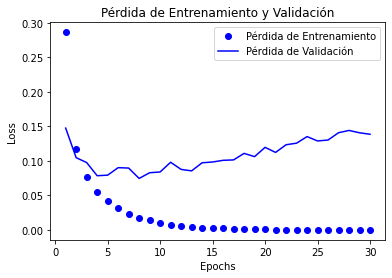

In [16]:
pinta_perdida_entrenamiento_validacion(historia0)

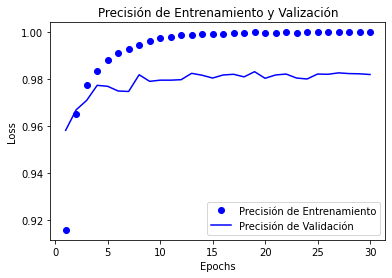

In [17]:
pinta_precision_entrenamiento_validacion(historia0)

### Caso 1: Con regularizador l1

In [18]:
network1 = crea_modelo(1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [19]:
network1 = compila_modelo(network1)

In [20]:
historia1 = entrena_modelo(network1)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 2.1553 - accuracy: 0.8440 - val_loss: 0.9861 - val_accuracy: 0.8979
Epoch 2/30
391/391 [==============================] - 1s 3ms/step - loss: 0.9709 - accuracy: 0.8761 - val_loss: 0.8882 - val_accuracy: 0.8962
Epoch 3/30
391/391 [==============================] - 1s 4ms/step - loss: 0.8395 - accuracy: 0.9021 - val_loss: 0.7813 - val_accuracy: 0.9153
Epoch 4/30
391/391 [==============================] - 1s 3ms/step - loss: 0.7634 - accuracy: 0.9154 - val_loss: 0.7129 - val_accuracy: 0.9320
Epoch 5/30
391/391 [==============================] - 1s 3ms/step - loss: 0.7105 - accuracy: 0.9248 - val_loss: 0.6581 - val_accuracy: 0.9390
Epoch 6/30
391/391 [==============================] - 1s 3ms/step - loss: 0.6727 - accuracy: 0.9309 - val_loss: 0.6500 - val_accuracy: 0.9369
Epoch 7/30
391/391 [==============================] - 1s 3ms/step - loss: 0.6436 - accuracy: 0.9359 - val_loss: 0.6443 - val_accuracy: 0.9334
Epoch 

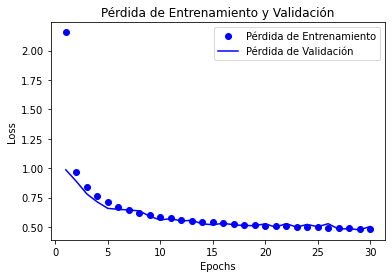

In [21]:
pinta_perdida_entrenamiento_validacion(historia1)

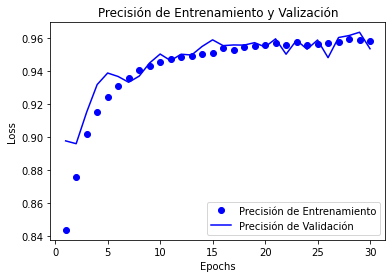

In [22]:
pinta_precision_entrenamiento_validacion(historia1)

### Caso 2: Con regularizador l2

In [23]:
network2 = crea_modelo(2)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [24]:
network2 = compila_modelo(network2)

In [25]:
historia2 = entrena_modelo(network2)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 0.5279 - accuracy: 0.9107 - val_loss: 0.3199 - val_accuracy: 0.9489
Epoch 2/30
391/391 [==============================] - 1s 3ms/step - loss: 0.2654 - accuracy: 0.9541 - val_loss: 0.2183 - val_accuracy: 0.9650
Epoch 3/30
391/391 [==============================] - 1s 4ms/step - loss: 0.2115 - accuracy: 0.9627 - val_loss: 0.1878 - val_accuracy: 0.9702
Epoch 4/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1870 - accuracy: 0.9673 - val_loss: 0.1773 - val_accuracy: 0.9704
Epoch 5/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1755 - accuracy: 0.9694 - val_loss: 0.1943 - val_accuracy: 0.9634
Epoch 6/30
391/391 [==============================] - 1s 3ms/step - loss: 0.1654 - accuracy: 0.9703 - val_loss: 0.1736 - val_accuracy: 0.9683
Epoch 7/30
391/391 [==============================] - 1s 3ms/step - loss: 0.1580 - accuracy: 0.9721 - val_loss: 0.1624 - val_accuracy: 0.9720
Epoch 

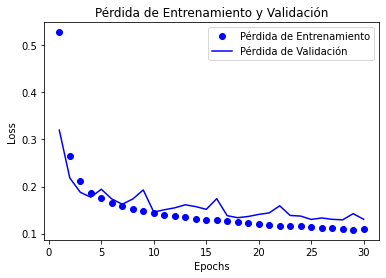

In [26]:
pinta_perdida_entrenamiento_validacion(historia2)

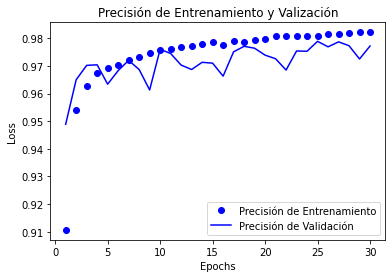

In [27]:
pinta_precision_entrenamiento_validacion(historia2)

### Caso 3: Con regularizador l1_l2

In [44]:
network3 = crea_modelo(3)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 512)               401920    
                                                                 
 dense_15 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [45]:
network3 = compila_modelo(network3)

In [46]:
historia3 = entrena_modelo(network3)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 2.1840 - accuracy: 0.8390 - val_loss: 1.1536 - val_accuracy: 0.8503
Epoch 2/30
391/391 [==============================] - 2s 4ms/step - loss: 0.9916 - accuracy: 0.8734 - val_loss: 0.8413 - val_accuracy: 0.9149
Epoch 3/30
391/391 [==============================] - 2s 4ms/step - loss: 0.8734 - accuracy: 0.8957 - val_loss: 0.8112 - val_accuracy: 0.9116
Epoch 4/30
391/391 [==============================] - 1s 3ms/step - loss: 0.8060 - accuracy: 0.9078 - val_loss: 0.7616 - val_accuracy: 0.9217
Epoch 5/30
391/391 [==============================] - 1s 3ms/step - loss: 0.7542 - accuracy: 0.9177 - val_loss: 0.7094 - val_accuracy: 0.9345
Epoch 6/30
391/391 [==============================] - 1s 3ms/step - loss: 0.7162 - accuracy: 0.9236 - val_loss: 0.7646 - val_accuracy: 0.9008
Epoch 7/30
391/391 [==============================] - 1s 3ms/step - loss: 0.6855 - accuracy: 0.9284 - val_loss: 0.6608 - val_accuracy: 0.9372
Epoch 

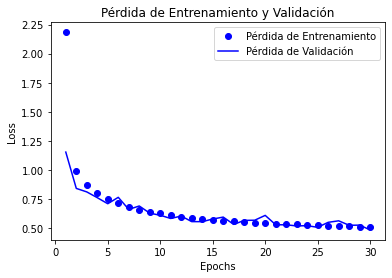

In [47]:
pinta_perdida_entrenamiento_validacion(historia3)

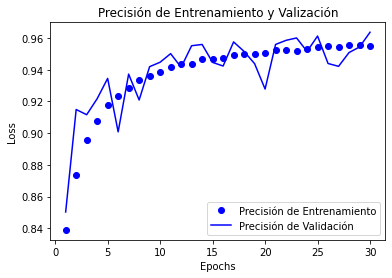

In [48]:
pinta_precision_entrenamiento_validacion(historia3)

### Caso 4: Con Droput

In [49]:
network4 = crea_modelo(4)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 512)               401920    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [50]:
network4 = compila_modelo(network4)

In [51]:
historia4 = entrena_modelo(network4)

Epoch 1/30
391/391 [==============================] - 2s 4ms/step - loss: 0.3489 - accuracy: 0.8977 - val_loss: 0.1576 - val_accuracy: 0.9563
Epoch 2/30
391/391 [==============================] - 2s 4ms/step - loss: 0.1664 - accuracy: 0.9505 - val_loss: 0.1186 - val_accuracy: 0.9669
Epoch 3/30
391/391 [==============================] - 1s 3ms/step - loss: 0.1276 - accuracy: 0.9617 - val_loss: 0.0966 - val_accuracy: 0.9716
Epoch 4/30
391/391 [==============================] - 1s 3ms/step - loss: 0.1062 - accuracy: 0.9685 - val_loss: 0.0889 - val_accuracy: 0.9739
Epoch 5/30
391/391 [==============================] - 2s 4ms/step - loss: 0.0915 - accuracy: 0.9725 - val_loss: 0.0842 - val_accuracy: 0.9770
Epoch 6/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0822 - accuracy: 0.9755 - val_loss: 0.0825 - val_accuracy: 0.9772
Epoch 7/30
391/391 [==============================] - 1s 3ms/step - loss: 0.0743 - accuracy: 0.9774 - val_loss: 0.0800 - val_accuracy: 0.9769
Epoch 

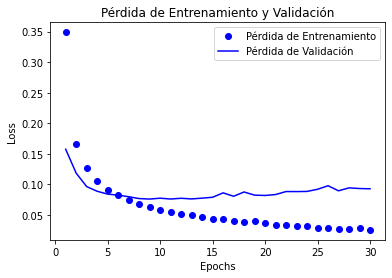

In [52]:
pinta_perdida_entrenamiento_validacion(historia4)

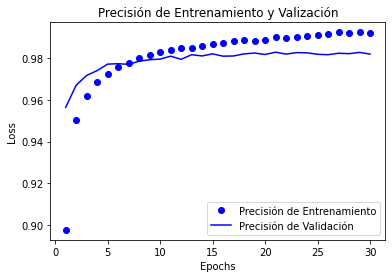

In [53]:
pinta_precision_entrenamiento_validacion(historia4)

### Caso 5: Error de código de regularizador

In [43]:
network5 = crea_modelo(5)

Error no es ninguno de estos valores 
 


### CONCLUSIONES

En primer modelo aprende muy bien, aunque hay un poco de overfitting
El segundo caso funciona un poco mejor que el segundo caso funciona mejor que en el primer caso


---

